
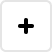
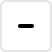
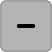
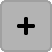
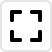
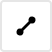
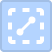
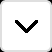
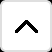
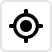

In [1]:
from lets_plot import *
import pandas as pd
LetsPlot.setup_html()

In [2]:
ggplot() + geom_label(x=0, y=0, label='Lorem ipsum', size=14) + ggsize(500, 200)

In [3]:
ggplot() + geom_label(x=0, y=0, 
                      label='Lorem ipsum', 
                      size=14, 
                      fill='#edf8e9', 
                      color='#238b45', 
                      fontface='bold',
                      label_padding=1.0,
                      label_r=0.5,
                      label_size=2.0
                    ) + ggsize(500, 200) 

In [4]:
families = [
    "Arial", 
    "Calibri", 
    "Garamond",
    "Geneva",
    "Georgia",
    "Helvetica",
    "Lucida Grande",
    "Rockwell",
    "Times New Roman",
    "Verdana",
    "sans-serif",
    "serif",
    "monospace"
]
ggplot() + geom_label(aes(y=list(range(len(families))), label=families, family=families), size=10,
                       label_padding=0,
                       label_r=0)

In [5]:
d = {
    'hjust': [0, 0.5, 1],
    'vjust': [0, 0.5, 1],
    'angle': [0, 45, 90],
    'text' : ['Text'] 
}

from itertools import product
td = pd.DataFrame(product(*d.values()), columns=d.keys())

(ggplot(td, aes(x='hjust', y='vjust')) + 
    geom_point(size=3) +
    geom_label(aes(label='text', angle='angle', hjust='hjust', vjust='vjust'), size=9) +
    facet_grid(y='angle') +
    scale_x_continuous(breaks=[0, 0.5, 1], expand=[0.1]) +
    scale_y_continuous(breaks=[0, 0.5, 1], expand=[0.0, 0.5]) +
    theme_classic() + theme(panel_border=element_rect(size=1))
)

In [6]:
mpg = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg2.csv")
mpg.head()

miles per gallon  number of cylinders  engine displacement (cu. inches)  \
0              18.0                    8                             307.0   
1              15.0                    8                             350.0   
2              18.0                    8                             318.0   
3              16.0                    8                             304.0   
4              17.0                    8                             302.0   

   engine horsepower  vehicle weight (lbs.)  time to accelerate (sec.)  \
0                130                   3504                       12.0   
1                165                   3693                       11.5   
2                150                   3436                       11.0   
3                150                   3433                       12.0   
4                140                   3449                       10.5   

   model year origin of car               vehicle name  
0          70            US  chevrolet chevelle malibu  
1          70            US          buick skylark 320  
2          70            US         plymouth satellite  
3          70            US              amc rebel sst  
4          70            US                ford torino

In [7]:
p = ggplot(mpg.head(30), aes('vehicle weight (lbs.)', 'miles per gallon', label='vehicle name'))

p + geom_label()

In [8]:
from lets_plot.mapping import as_discrete

p + geom_label(aes(fill = as_discrete('number of cylinders', order=1)),
               color = 'white', 
               fontface = 'bold'
              ) + ggsize(800,400)

In [9]:
from lets_plot.geo_data import *

gcoder = geocode_states('us-48').inc_res()

gplot = (ggplot() +
              geom_polygon(aes(fill='state'), 
                           data=gcoder.get_boundaries(), 
                           show_legend=False, 
                           color="white",
                           tooltips='none') +
              coord_map() +
              theme(axis_line="blank", axis_text="blank", axis_title="blank", axis_ticks="blank") +
              scale_fill_brewer(name="state", palette="Dark2") + 
              ggsize(900, 500))

gplot + geom_label(aes(label='state'), data=gcoder.get_centroids(), size=6)

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [10]:
# livemap

data = {
    'label': ["==    0 ==>", "==   60 ==>", "==  120 ==>", "==  180 ==>", "== -60 ==>", "== -120 ==>"],
    'angle': [0, 60, 120, 180, -60, -120],
}

ggplot(data) + geom_livemap() + geom_point(x=0, y=0, size=140, color='white', alpha=0.6)\
  + geom_label(aes(label = 'label', angle='angle'), data=data,
               x=0, y=0, 
               hjust = "left", vjust = "center",
               size=10, 
               family='monospace',
               color='red')